# Model Comparison

After training and testing our models, we want to estimate which one solves the classification problem best. Since we can't decide solely based on the model precision, we're going to compare them using the ROC curve.

In [2]:
# Importing the training and testing sets from the KNN file
import pickle

# Load the data from the file
with open('data.pkl', 'rb') as f:
    X_train, X_test, Y_train, Y_test = pickle.load(f)

In [8]:
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In this file, we are going to compare the models that performed the best in their groups: KNN classifier with hyperparameter tuning, Decision Tree Classifier without class balancing and with hyperparameter tuning, as well as a Random Forest Classifier.

In [6]:
# GridSearchCV KNN model
params = {'criterion': ['gini', 'entropy'], 
          'max_depth': [2, 4, 6, 8]
         }

params_grid = {'n_neighbors': range(10, 50, 5),
               'weights': ['uniform', 'distance'],
                'p': [1, 2]}

knn = GridSearchCV(KNeighborsClassifier(), params_grid, cv=6, verbose=4)

In [7]:
# GridSearchCV DTC model
from sklearn.model_selection import GridSearchCV
params =  {
    'criterion': ['gini', 'entropy'],
    'max_depth': [x for x in range(3, 30)],
    'max_features': [x for x in range(3, 40)]
}

dtc = GridSearchCV(DecisionTreeClassifier(), param_grid= params)

In [9]:
# Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=41)

## The ROC curve

The Receiver Operating Characteristic (ROC) curve is a graphical representation of the trade-off between fpr and tpr. It plots the True Positive Rate (TPR) against the False Positive Rate (FPR) for different classification thresholds.


* False Positive Rate (fpr) represents the ratio of the number of false positive predictions to the total number of actual negative samples. It is defined as FP:(FP+TN), where FP is the number of false positives and TN is the number of true negatives.


* True Positive Rate (tpr), also known as sensitivity or recall, represents the ratio of the number of true positive predictions to the total number of actual positive samples. It is defined as TP:(TP+FN), where TP is the number of true positives and FN is the number of false negatives.

The AUC (Area Under the Curve) is a metric that represents the overall performance of the model in discriminating between positive and negative classes. It measures the area under the ROC curve, with values ranging from 0 to 1, where a score of 0.5 represents a random classifier and a score of 1 represents a perfect classifier.
In general, **the higher the AUC, the better the performance of the model.**

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

In [11]:
models = [knn, dtc, rfc]
model_names = ["KNN with GridSearchCV", "DTC with GridSearchCV", "RandomForestClassifier"]
colors = ["green", "blue", "red"]

## Low-Rated class Accuracy

In [ ]:
# Choose Low-rated as the positive class
pos_class = "Low-Rated" 

# Combine the other two classes into a single negative class
neg_class = ["Medium-Rated", "High-Rated"]

# Convert labels to binary format
y_train_bin = (Y_train == pos_class).astype(int)
y_test_bin = (Y_test == pos_class).astype(int)

plt.figure()
for model, model_name, color in zip(models, model_names, colors):
    # Train a classifier on the training data
    model.fit(X_train, y_train_bin)
    
    # Make predictions on the test data
    y_pred = model.predict_proba(X_test)[:, 1]
    
    # Compute ROC curve and area under the curve (AUC)
    fpr, tpr, _ = roc_curve(y_test_bin, y_pred)
    roc_auc = auc(fpr, tpr)
    
    # Plot the ROC curve
    plt.plot(fpr, tpr, color=color, lw=2, label= model_name +'(AUC = %0.2f)' % roc_auc)
    

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Low Rated')
plt.legend(loc="lower right")
plt.show()

When it comes to rating Low-Rated actors/directors, all of the models work almost perfectly.

## Medium-Rated class Accuracy

Fitting 6 folds for each of 32 candidates, totalling 192 fits
[CV 1/6] END n_neighbors=10, p=1, weights=uniform;, score=0.893 total time=   0.1s
[CV 2/6] END n_neighbors=10, p=1, weights=uniform;, score=0.900 total time=   0.0s
[CV 3/6] END n_neighbors=10, p=1, weights=uniform;, score=0.892 total time=   0.0s
[CV 4/6] END n_neighbors=10, p=1, weights=uniform;, score=0.895 total time=   0.0s
[CV 5/6] END n_neighbors=10, p=1, weights=uniform;, score=0.889 total time=   0.2s
[CV 6/6] END n_neighbors=10, p=1, weights=uniform;, score=0.887 total time=   0.0s
[CV 1/6] END n_neighbors=10, p=1, weights=distance;, score=0.969 total time=   0.0s
[CV 2/6] END n_neighbors=10, p=1, weights=distance;, score=0.972 total time=   0.0s
[CV 3/6] END n_neighbors=10, p=1, weights=distance;, score=0.969 total time=   0.0s
[CV 4/6] END n_neighbors=10, p=1, weights=distance;, score=0.970 total time=   0.0s
[CV 5/6] END n_neighbors=10, p=1, weights=distance;, score=0.968 total time=   0.0s
[CV 6/6] END n_neigh

[CV 3/6] END n_neighbors=30, p=1, weights=uniform;, score=0.851 total time=   0.0s
[CV 4/6] END n_neighbors=30, p=1, weights=uniform;, score=0.852 total time=   0.0s
[CV 5/6] END n_neighbors=30, p=1, weights=uniform;, score=0.852 total time=   0.0s
[CV 6/6] END n_neighbors=30, p=1, weights=uniform;, score=0.848 total time=   0.1s
[CV 1/6] END n_neighbors=30, p=1, weights=distance;, score=0.970 total time=   0.0s
[CV 2/6] END n_neighbors=30, p=1, weights=distance;, score=0.973 total time=   0.0s
[CV 3/6] END n_neighbors=30, p=1, weights=distance;, score=0.969 total time=   0.0s
[CV 4/6] END n_neighbors=30, p=1, weights=distance;, score=0.970 total time=   0.0s
[CV 5/6] END n_neighbors=30, p=1, weights=distance;, score=0.968 total time=   0.0s
[CV 6/6] END n_neighbors=30, p=1, weights=distance;, score=0.961 total time=   0.0s
[CV 1/6] END n_neighbors=30, p=2, weights=uniform;, score=0.845 total time=   0.1s
[CV 2/6] END n_neighbors=30, p=2, weights=uniform;, score=0.858 total time=   0.0

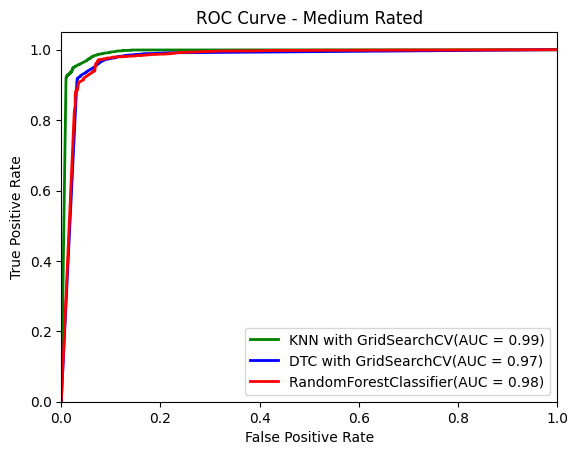

In [13]:
# Choose Medium-rated as the positive class
pos_class = "Medium-Rated" 
# Combine the other two classes into a single negative class
neg_class = ["Low-Rated", "High-Rated"] 

# Convert labels to binary format
y_train_bin = (Y_train == pos_class).astype(int)
y_test_bin = (Y_test == pos_class).astype(int)

plt.figure()
for model, model_name, color in zip(models, model_names, colors):
    # Train a classifier on the training data
    model.fit(X_train, y_train_bin)
    
    # Make predictions on the test data
    y_pred = model.predict_proba(X_test)[:, 1]
    
    # Compute ROC curve and area under the curve (AUC)
    fpr, tpr, _ = roc_curve(y_test_bin, y_pred)
    roc_auc = auc(fpr, tpr)
    
    # Plot the ROC curve
    plt.plot(fpr, tpr, color=color, lw=2, label= model_name +'(AUC = %0.2f)' % roc_auc)
    

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Medium Rated')
plt.legend(loc="lower right")
plt.show()

Here, we can see that the KNN model with GridSearchCV is a bit more accurate than the other two.

Fitting 6 folds for each of 32 candidates, totalling 192 fits
[CV 1/6] END n_neighbors=10, p=1, weights=uniform;, score=0.915 total time=   0.0s
[CV 2/6] END n_neighbors=10, p=1, weights=uniform;, score=0.924 total time=   0.0s
[CV 3/6] END n_neighbors=10, p=1, weights=uniform;, score=0.921 total time=   0.0s
[CV 4/6] END n_neighbors=10, p=1, weights=uniform;, score=0.923 total time=   0.0s
[CV 5/6] END n_neighbors=10, p=1, weights=uniform;, score=0.916 total time=   0.0s
[CV 6/6] END n_neighbors=10, p=1, weights=uniform;, score=0.914 total time=   0.0s
[CV 1/6] END n_neighbors=10, p=1, weights=distance;, score=0.977 total time=   0.0s
[CV 2/6] END n_neighbors=10, p=1, weights=distance;, score=0.980 total time=   0.0s
[CV 3/6] END n_neighbors=10, p=1, weights=distance;, score=0.981 total time=   0.0s
[CV 4/6] END n_neighbors=10, p=1, weights=distance;, score=0.979 total time=   0.0s
[CV 5/6] END n_neighbors=10, p=1, weights=distance;, score=0.977 total time=   0.0s
[CV 6/6] END n_neigh

[CV 3/6] END n_neighbors=30, p=1, weights=uniform;, score=0.888 total time=   0.0s
[CV 4/6] END n_neighbors=30, p=1, weights=uniform;, score=0.891 total time=   0.0s
[CV 5/6] END n_neighbors=30, p=1, weights=uniform;, score=0.884 total time=   0.0s
[CV 6/6] END n_neighbors=30, p=1, weights=uniform;, score=0.880 total time=   0.0s
[CV 1/6] END n_neighbors=30, p=1, weights=distance;, score=0.979 total time=   0.0s
[CV 2/6] END n_neighbors=30, p=1, weights=distance;, score=0.980 total time=   0.0s
[CV 3/6] END n_neighbors=30, p=1, weights=distance;, score=0.980 total time=   0.0s
[CV 4/6] END n_neighbors=30, p=1, weights=distance;, score=0.979 total time=   0.0s
[CV 5/6] END n_neighbors=30, p=1, weights=distance;, score=0.977 total time=   0.0s
[CV 6/6] END n_neighbors=30, p=1, weights=distance;, score=0.972 total time=   0.0s
[CV 1/6] END n_neighbors=30, p=2, weights=uniform;, score=0.883 total time=   0.0s
[CV 2/6] END n_neighbors=30, p=2, weights=uniform;, score=0.892 total time=   0.0

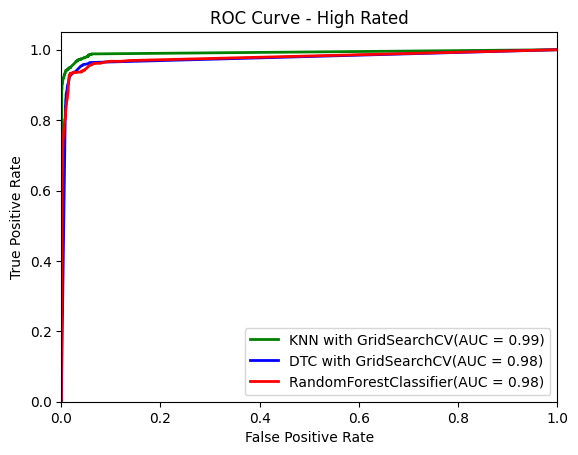

In [14]:
# Choose High-rated as the positive class
pos_class = "High-Rated" 
# Combine the other two classes into a single negative class
neg_class = ["Low-Rated", "Medium-Rated"] 

# Convert labels to binary format
y_train_bin = (Y_train == pos_class).astype(int)
y_test_bin = (Y_test == pos_class).astype(int)

plt.figure()
for model, model_name, color in zip(models, model_names, colors):
    # Train a classifier on the training data
    model.fit(X_train, y_train_bin)
    
    # Make predictions on the test data
    y_pred = model.predict_proba(X_test)[:, 1]
    
    # Compute ROC curve and area under the curve (AUC)
    fpr, tpr, _ = roc_curve(y_test_bin, y_pred)
    roc_auc = auc(fpr, tpr)
    
    # Plot the ROC curve
    plt.plot(fpr, tpr, color=color, lw=2, label= model_name +'(AUC = %0.2f)' % roc_auc)
    

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - High Rated')
plt.legend(loc="lower right")
plt.show()

In conclusion, the KNN with GridSearchCV optimization outperforms the other two models.